##ASSIGNMENT 3

In [ ]:
print("the dataset is downloaded and loaded in task 2")

the dataset is downloaded and loaded in task 2


In [ ]:
import pandas as pd
df=pd.read_csv('penguins_size.csv')


In [ ]:
import matplotlib.pyplot as plt

##Univariate

Summary statistics for culmen_length_mm: 
 count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: culmen_length_mm, dtype: float64



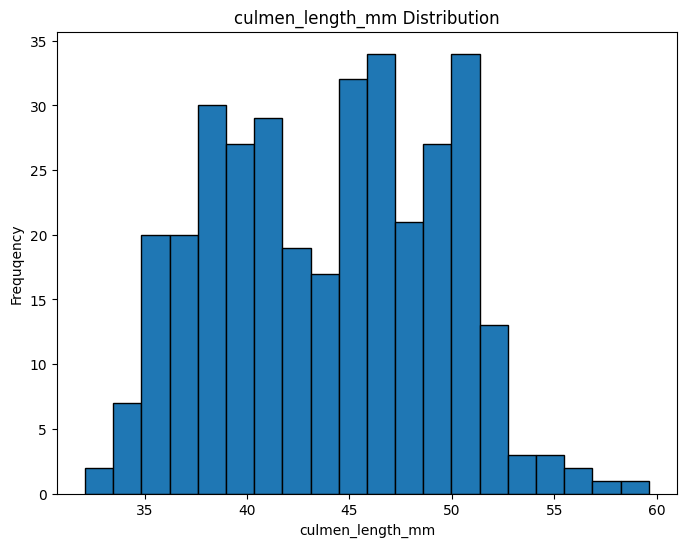

In [ ]:

num=['culmen_length_mm']
for var in num:
  summ=df[var].describe()
  print(f"Summary statistics for {var}: \n {summ}\n")
  plt.figure(figsize=(8,6))
  plt.hist(df[var],bins=20,edgecolor='k')
  plt.xlabel(var)
  plt.ylabel('Frequqency')
  plt.title(f'{var} Distribution')
  plt.show()

##Bivariate

In [ ]:
cat=['species','island','sex']
for var1 in cat:
  for var2 in cat:
    if var1!=var2:
      cross_tab=pd.crosstab(df[var1],df[var2])
      print(f"Cross-tabulaltion between {var1} and {var2}:\n{cross_tab}\n")

Cross-tabulaltion between species and island:
island     Biscoe  Dream  Torgersen
species                            
Adelie         44     56         52
Chinstrap       0     68          0
Gentoo        124      0          0

Cross-tabulaltion between species and sex:
sex        .  FEMALE  MALE
species                   
Adelie     0      73    73
Chinstrap  0      34    34
Gentoo     1      58    61

Cross-tabulaltion between island and species:
species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         44          0     124
Dream          56         68       0
Torgersen      52          0       0

Cross-tabulaltion between island and sex:
sex        .  FEMALE  MALE
island                    
Biscoe     1      80    83
Dream      0      61    62
Torgersen  0      24    23

Cross-tabulaltion between sex and species:
species  Adelie  Chinstrap  Gentoo
sex                               
.             0          0       1
FEMALE       73         34      58
M

In [ ]:
import seaborn as sns
num=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']


##Multivariate

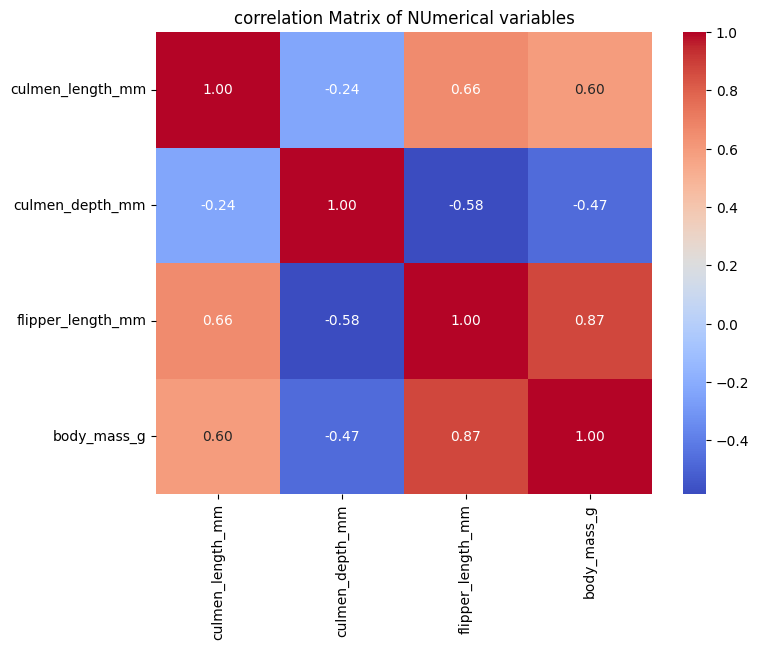

In [ ]:
corr_m=df[num].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_m,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation Matrix of NUmerical variables')
plt.show()

In [ ]:
num_v=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
des=df[num_v].describe()
print(des)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [ ]:
import numpy as np
miss_v=df.isnull().sum()
col_m=miss_v[miss_v>0]
print("column with missing values:")
print(col_m)
df_cl=df.dropna()
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)
remaining_missing = df.isnull().sum().sum()
print("\nRemaining missing values:", remaining_missing)

column with missing values:
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Remaining missing values: 10


In [ ]:
from scipy import stats
numerical_vars = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
z_threshold = 3
df_no_outliers = df.copy()
for var in numerical_vars:
  z_scores = np.abs(stats.zscore(df[var]))
  outliers = z_scores > z_threshold
  df_no_outliers[var][outliers] = np.nan
df_no_outliers_cleaned = df_no_outliers.dropna()
outliers_removed = df.shape[0] - df_no_outliers_cleaned.shape[0]
print("Number of outliers removed:", outliers_removed)


Number of outliers removed: 10


<ipython-input-20-1075646a1487>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[var][outliers] = np.nan


In [ ]:
from scipy.stats import chi2_contingency
target_variable = 'species'
independent_variables = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for var in independent_variables:
   contingency_table = pd.crosstab(df[target_variable], df[var])
   chi2, p, dof, expected = chi2_contingency(contingency_table)
   print(f"Chi-squared test results for {var}:")
   print(f"Chi-squared statistic: {chi2}")
   print(f"P-value: {p}")
   print()


Chi-squared test results for culmen_length_mm:
Chi-squared statistic: 470.5338593162223
P-value: 3.868884352428073e-07

Chi-squared test results for culmen_depth_mm:
Chi-squared statistic: 379.9739448241096
P-value: 6.137713516463007e-20

Chi-squared test results for flipper_length_mm:
Chi-squared statistic: 382.2373661501773
P-value: 9.294963538872332e-32

Chi-squared test results for body_mass_g:
Chi-squared statistic: 367.89770778147147
P-value: 9.265117412024159e-14



In [ ]:
categorical_columns = ['island', 'sex']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
independent_variables = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
dependent_variable = 'species'
X=df[independent_variables]
y = df[dependent_variable]

In [ ]:
from sklearn.preprocessing import StandardScaler
independent_variables = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[independent_variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
independent_variables = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
dependent_variable = 'species'
X = df[independent_variables]
y = df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data - Features shape:", X_train.shape)
print("Testing data - Features shape:", X_test.shape)
print("Training data - Target shape:", y_train.shape)
print("Testing data - Target shape:", y_test.shape)

Training data - Features shape: (275, 4)
Testing data - Features shape: (69, 4)
Training data - Target shape: (275,)
Testing data - Target shape: (69,)


In [ ]:
#Accuracy Predictions
#Accuracy Values Generation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9890909090909091
Testing Accuracy: 0.9710144927536232
